In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('http://taanila.fi/happy.xlsx')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [3]:
df.pivot_table(values='Happiness Score', index='Year')

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [5]:
df[df['Year']==2017].pivot_table(values='Happiness Score', index='Region'
                                ).sort_values('Happiness Score', ascending=False)

,Happiness Score
Region,
Australia and New Zealand,7.299000
North America,7.154500
Western Europe,6.703714
Latin America and Caribbean,5.957818
Eastern Asia,5.646667
Southeastern Asia,5.444875
Central and Eastern Europe,5.409931
Middle East and Northern Africa,5.369684
Southern Asia,4.628429


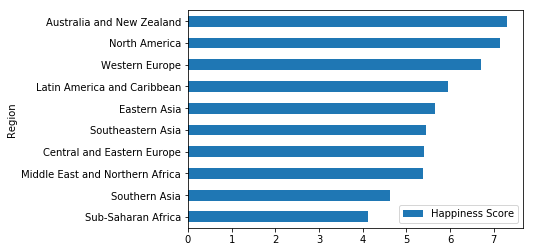

In [6]:
df[df['Year']==2017].pivot_table(values='Happiness Score', index='Region'
                                ).sort_values('Happiness Score').plot.barh()

In [7]:
df.pivot_table(values='Happiness Score', index=['Region','Year'])

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [8]:
df.pivot_table(values='Happiness Score', index='Region', columns='Year')

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


In [10]:
df[df['Year']==2017].pivot_table(values='Happiness Score', index='Region',aggfunc=[np.mean,np.median,
                                                                                  min,max,np.std,len])

,mean,median,min,max,std,len
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,,
Australia and New Zealand,7.299000,7.2990,7.284,7.314,0.021213,2.0
Central and Eastern Europe,5.409931,5.3950,4.096,6.609,0.591644,29.0
Eastern Asia,5.646667,5.6550,4.955,6.422,0.521728,8.0
Latin America and Caribbean,5.957818,6.0395,3.603,7.079,0.750925,24.0
Middle East and Northern Africa,5.369684,5.3360,3.462,7.213,0.985246,20.0
North America,7.154500,7.1545,6.993,7.316,0.228395,2.0
Southeastern Asia,5.444875,5.3460,4.168,6.572,0.865941,9.0
Southern Asia,4.628429,4.6080,3.794,5.269,0.499732,7.0


In [11]:
score4 = pd.qcut(df[df['Year']==2017]['Happiness Score'],4)
df[df['Year']==2017].pivot_table(values='Happiness Score', index=['Region', score4],aggfunc=len)

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.506]               NaN
                                (4.506, 5.279]               NaN
                                (5.279, 6.102]               NaN
                                (6.102, 7.537]               2.0
Central and Eastern Europe      (2.692, 4.506]               3.0
                                (4.506, 5.279]               9.0
                                (5.279, 6.102]              16.0
                                (6.102, 7.537]               1.0
Eastern Asia                    (2.692, 4.506]               NaN
                                (4.506, 5.279]               2.0
                                (5.279, 6.102]               3.0
                                (6.102, 7.537]               1.0
Latin America and Caribbean     (2.692, 4.506]               1.0
                                (4.506, 5.279]               3.0
                                (5.279, 6.102]               8.0
                                (6.102, 7.537]              10.0
Middle East and Northern Africa (2.692, 4.506]               3.0
                                (4.506, 5.279]               6.0
                                (5.279, 6.102]               5.0
                                (6.102, 7.537]               5.0
North America                   (2.692, 4.506]               NaN
                                (4.506, 5.279]               NaN
                                (5.279, 6.102]               NaN
                                (6.102, 7.537]               2.0
Southeastern Asia               (2.692, 4.506]               1.0
                                (4.506, 5.279]               3.0
                                (5.279, 6.102]               2.0
                                (6.102, 7.537]               2.0
Southern Asia                   (2.692, 4.506]               3.0
                                (4.506, 5.279]               4.0
                                (5.279, 6.102]               NaN
                                (6.102, 7.537]               NaN
Sub-Saharan Africa              (2.692, 4.506]              28.0
                                (4.506, 5.279]              10.0
                                (5.279, 6.102]               1.0
                                (6.102, 7.537]               NaN
Western Europe                  (2.692, 4.506]               NaN
                                (4.506, 5.279]               2.0
                                (5.279, 6.102]               3.0
                                (6.102, 7.537]              16.0